<strong>
    <font color="#0E1117">
        Author: lprtk
    </font>
</strong>

<br/>
<br/>


<Center>
    <h1 style="font-family: Arial">
        <font color="#0E1117">
            NLP: topic modeling using word2vec & LDA
        </font>
    </h1>
</Center>

-------------------------------------------------------------------------------------------------------------------------------

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Librairies import
        </font>
    </h2>
</div>

In [136]:
from gensim import corpora
from gensim.models import LdaMulticore, Word2Vec
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd
#from pyLDAvis import gensim_models
#pyLDAvis.enable_notebook()
from pyTCTK import TextNet
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

-------------------------------------------------------------------------------------------------------------------------------

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Data import
        </font>
    </h2>
</div>

In [137]:
df_data = pd.read_csv(filepath_or_buffer="data/df_topics.csv", sep=",")

In [138]:
df_data.head(3)

,Unnamed: 0,W_movie ID,Movie name,Release date,Countries,Languages,Genres,summary,Country_extract,Region
0,0,32986669,Robbery Under Arms,1907-11-02,"{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",Key scenes of the film included the branding o...,['Australia'],['Asia and Pacific']
1,1,7870349,Dr. Jekyll and Mr. Hyde,1908-03-07,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",Dr. Jekyll and Mr. Hyde began with the raising...,['United States of America'],['America']
2,2,29391146,The Black Viper,1908-07-25,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/06ppq"": ""Silent film""}",A thug accosts a girl as she leaves her workpl...,['United States of America'],['America']


-------------------------------------------------------------------------------------------------------------------------------

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Text cleaning
        </font>
    </h2>
</div>

<p style="text-align: justify">
    We clean up the text in order to normalize it (lowercase, punctuation, etc.), remove all special characters and words that don't make sense or don't provide any information (stopwords) and then we transform words with a common root into a single word (lemmatization).
</p>

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            1) Lowercase
        </font>
    </h3>
</div>

In [139]:
df_data = TextNet(
    data=df_data,
    column="summary"
).lowercase()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            2) Punctuation
        </font>
    </h3>
</div>

In [140]:
df_data = TextNet(
    data=df_data,
    column="summary"
).remove_punctuation()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            3) Specific cleaning
        </font>
    </h3>
</div>

In [141]:
df_data = TextNet(
    data=df_data,
    column="summary"
).remove_url()

In [142]:
df_data = TextNet(
    data=df_data,
    column="summary"
).remove_html()

In [143]:
df_data = TextNet(
    data=df_data,
    column="summary"
).remove_email()

In [144]:
df_data = TextNet(
    data=df_data,
    column="summary"
).remove_digit()

In [145]:
df_data = TextNet(
    data=df_data,
    column="summary"
).remove_mention()

In [146]:
df_data = TextNet(
    data=df_data,
    column="summary"
).remove_single_character()

In [147]:
df_data = TextNet(
    data=df_data,
    column="summary"
).additional_cleaning(
    add_regexs=None
)

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            4) Remove stopwords
        </font>
    </h3>
</div>

In [148]:
def remove_stopword(text : str) -> str:
    list_stopwords = stopwords.words("english")
    return " ".join(
        [word for word in word_tokenize(text) if word not in list_stopwords]
    )

df_data["summary"] = df_data["summary"].apply(remove_stopword)

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            5) Lemmatization process
        </font>
    </h3>
</div>

In [149]:
def lemmatize(text : str) -> str:
    lemmatizer = WordNetLemmatizer()
    return " ".join(
        [lemmatizer.lemmatize(word) for word in word_tokenize(text)]
    )

df_data["summary"] = df_data["summary"].apply(lemmatize)

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            6) Remove spaces
        </font>
    </h3>
</div>

In [150]:
df_data = TextNet(
    data=df_data,
    column="summary"
).remove_space()

In [151]:
df_data = TextNet(
    data=df_data,
    column="summary"
).remove_whitespace()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            7) Tokenization process
        </font>
    </h3>
</div>

In [152]:
df_data["text_tokenized"] = df_data["summary"].apply(lambda x: word_tokenize(x))

In [153]:
df_data.head(3)

,Unnamed: 0,W_movie ID,Movie name,Release date,Countries,Languages,Genres,summary,Country_extract,Region,text_tokenized
0,0,32986669,Robbery Under Arms,1907-11-02,"{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",key scene film included branding stolen cattle...,['Australia'],['Asia and Pacific'],"[key, scene, film, included, branding, stolen,..."
1,1,7870349,Dr. Jekyll and Mr. Hyde,1908-03-07,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",dr jekyll mr hyde began raising stage curtain ...,['United States of America'],['America'],"[dr, jekyll, mr, hyde, began, raising, stage, ..."
2,2,29391146,The Black Viper,1908-07-25,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/06ppq"": ""Silent film""}",thug accosts girl leaf workplace man rescue th...,['United States of America'],['America'],"[thug, accosts, girl, leaf, workplace, man, re..."


<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Topic Modelling using LDA
        </font>
    </h2>
</div>

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            1) Create dictionary
        </font>
    </h3>
</div>

In [175]:
# Your existing code for preprocessing and dictionary creation
words_to_remove = ['one', 'find', 'get', 'go', 'two', 'tell', 'film', 'see', 'vampire']
df_data["text_tokenized"] = df_data["text_tokenized"].apply(
    lambda tokens: [token for token in tokens if token not in words_to_remove]
)
dictionary = corpora.Dictionary(df_data["text_tokenized"])
doc_term_matrix = [dictionary.doc2bow(paper) for paper in df_data["text_tokenized"]]

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            2) Build model
        </font>
    </h3>
</div>

In [176]:
lda_model = LdaMulticore(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=4,
    random_state=42,
    chunksize=200,
    passes=100,
    per_word_topics=True
)

In [177]:
lda_model.print_topics()

[(0,
  '0.004*"take" + 0.004*"back" + 0.003*"police" + 0.003*"car" + 0.003*"man" + 0.003*"new" + 0.003*"time" + 0.003*"home" + 0.003*"make" + 0.003*"life"'),
 (1,
  '0.005*"house" + 0.005*"back" + 0.004*"take" + 0.004*"kill" + 0.003*"try" + 0.003*"man" + 0.003*"home" + 0.003*"room" + 0.003*"father" + 0.003*"later"'),
 (2,
  '0.005*"father" + 0.004*"love" + 0.004*"take" + 0.004*"kill" + 0.004*"police" + 0.004*"son" + 0.004*"family" + 0.004*"life" + 0.003*"friend" + 0.003*"brother"'),
 (3,
  '0.004*"attack" + 0.004*"ship" + 0.003*"back" + 0.003*"escape" + 0.003*"take" + 0.003*"men" + 0.003*"kill" + 0.003*"soldier" + 0.003*"order" + 0.003*"group"')]

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            3) Topics' coherence
        </font>
    </h3>
</div>

In [178]:
coherence_model_lda = CoherenceModel(
    model=lda_model,
    texts=df_data["text_tokenized"],
    dictionary=dictionary,
    coherence="c_v"
)

coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence score: {round(coherence_lda, 4)}")

Coherence score: 0.3124


<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            4) Topics' keywords
        </font>
    </h3>
</div>

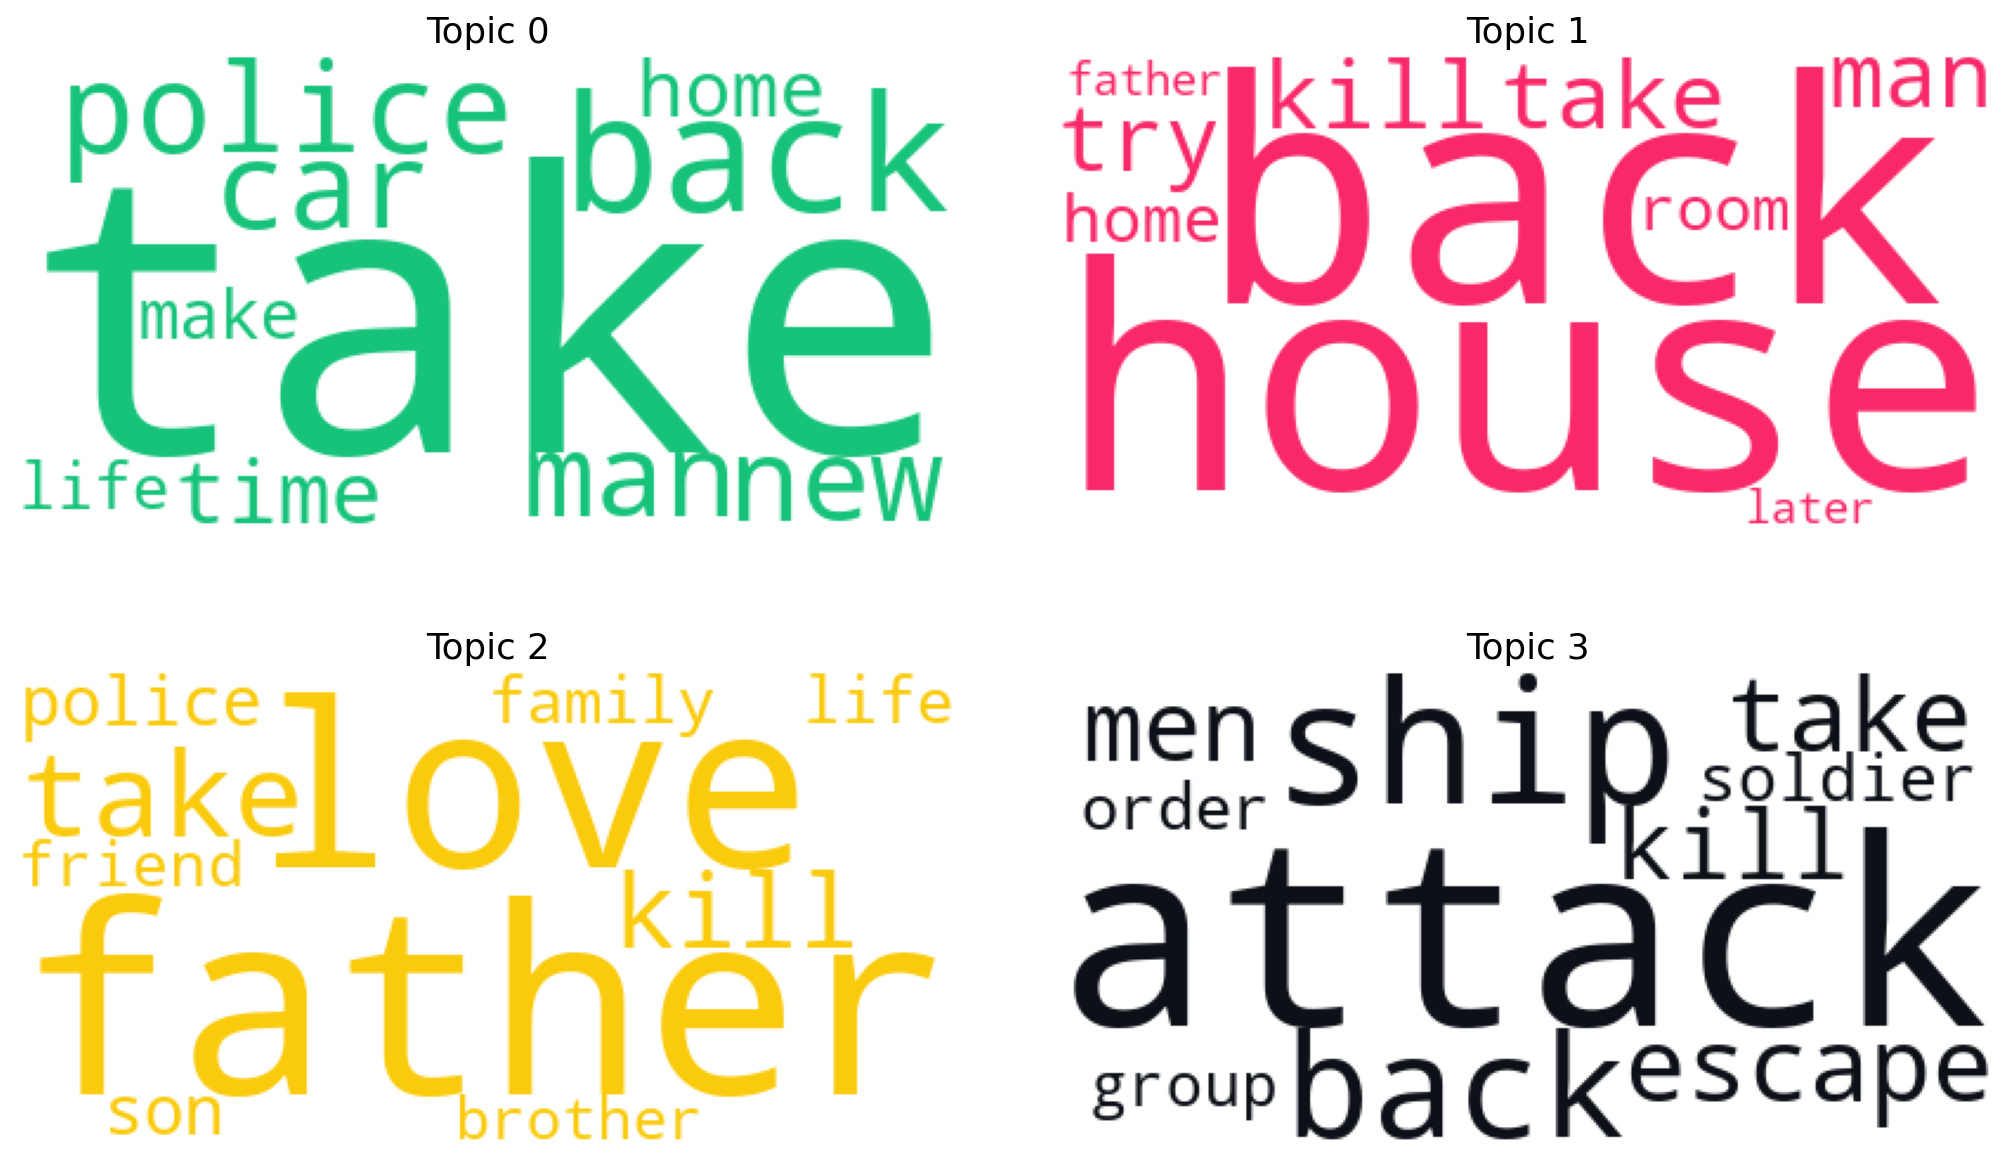

In [179]:
list_colors = ["#17C37B", "#F92969", "#FACA0C", "#0D1117"]

wc = WordCloud(
    background_color="white",
    max_words=10,
    max_font_size=300,
    colormap="tab10",
    color_func=lambda *args, **kwargs: list_colors[i],
    prefer_horizontal=1.0
)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True, dpi=160)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    wc.generate_from_frequencies(topic_words)
    plt.gca().imshow(wc)
    plt.gca().set_title("Topic "+str(i), fontdict=dict(size=16))
    plt.gca().axis("off")

plt.axis("off")
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.margins(x=0, y=0)
plt.show()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            5) Dominant topic for each document
        </font>
    </h3>
</div>

In [180]:
df_topics = pd.DataFrame(
    columns=["topic", "contribution", "keywords"]
)

# get main topic in each document
for i, list_rows in enumerate(lda_model[doc_term_matrix]):
    row = list_rows[0] if lda_model.per_word_topics else list_rows
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    
    # get the Dominant topic, Perc Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(row):
        if j == 0:
            wp = lda_model.show_topic(topic_num)
            topic_keywords = ", ".join([word for word, prop in wp])
            df_topics.loc[i] = [int(topic_num), round(prop_topic, 4), topic_keywords]
df_topics = pd.concat([df_topics.reset_index(drop=True), df_data["summary"].reset_index(drop=True)], axis=1)


In [181]:
df_topics.head(10)

,topic,contribution,keywords,summary
0,0,0.7717,"take, back, police, car, man, new, time, home,...",key scene film included branding stolen cattle...
1,1,0.7960,"house, back, take, kill, try, man, home, room,...",dr jekyll mr hyde began raising stage curtain ...
2,1,0.6307,"house, back, take, kill, try, man, home, room,...",thug accosts girl leaf workplace man rescue th...
3,0,0.9069,"take, back, police, car, man, new, time, home,...",small town drama group preparing pocahontas ty...
4,2,0.5280,"father, love, take, kill, police, son, family,...",two farm sister feeling romantic looking suito...
5,0,0.5053,"take, back, police, car, man, new, time, home,...",film divided section england murder sir richar...
6,0,0.9450,"take, back, police, car, man, new, time, home,...",ben hall men raid household keightley family r...
7,1,0.6174,"house, back, take, kill, try, man, home, room,...",florence grange pretty young danish woman vaca...
8,3,0.7034,"attack, ship, back, escape, take, men, kill, s...",currently known surviving footage film informa...
9,3,0.7564,"attack, ship, back, escape, take, men, kill, s...",story concern soldier desert regiment encounte...


<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            6) Topics' distribution
        </font>
    </h3>
</div>

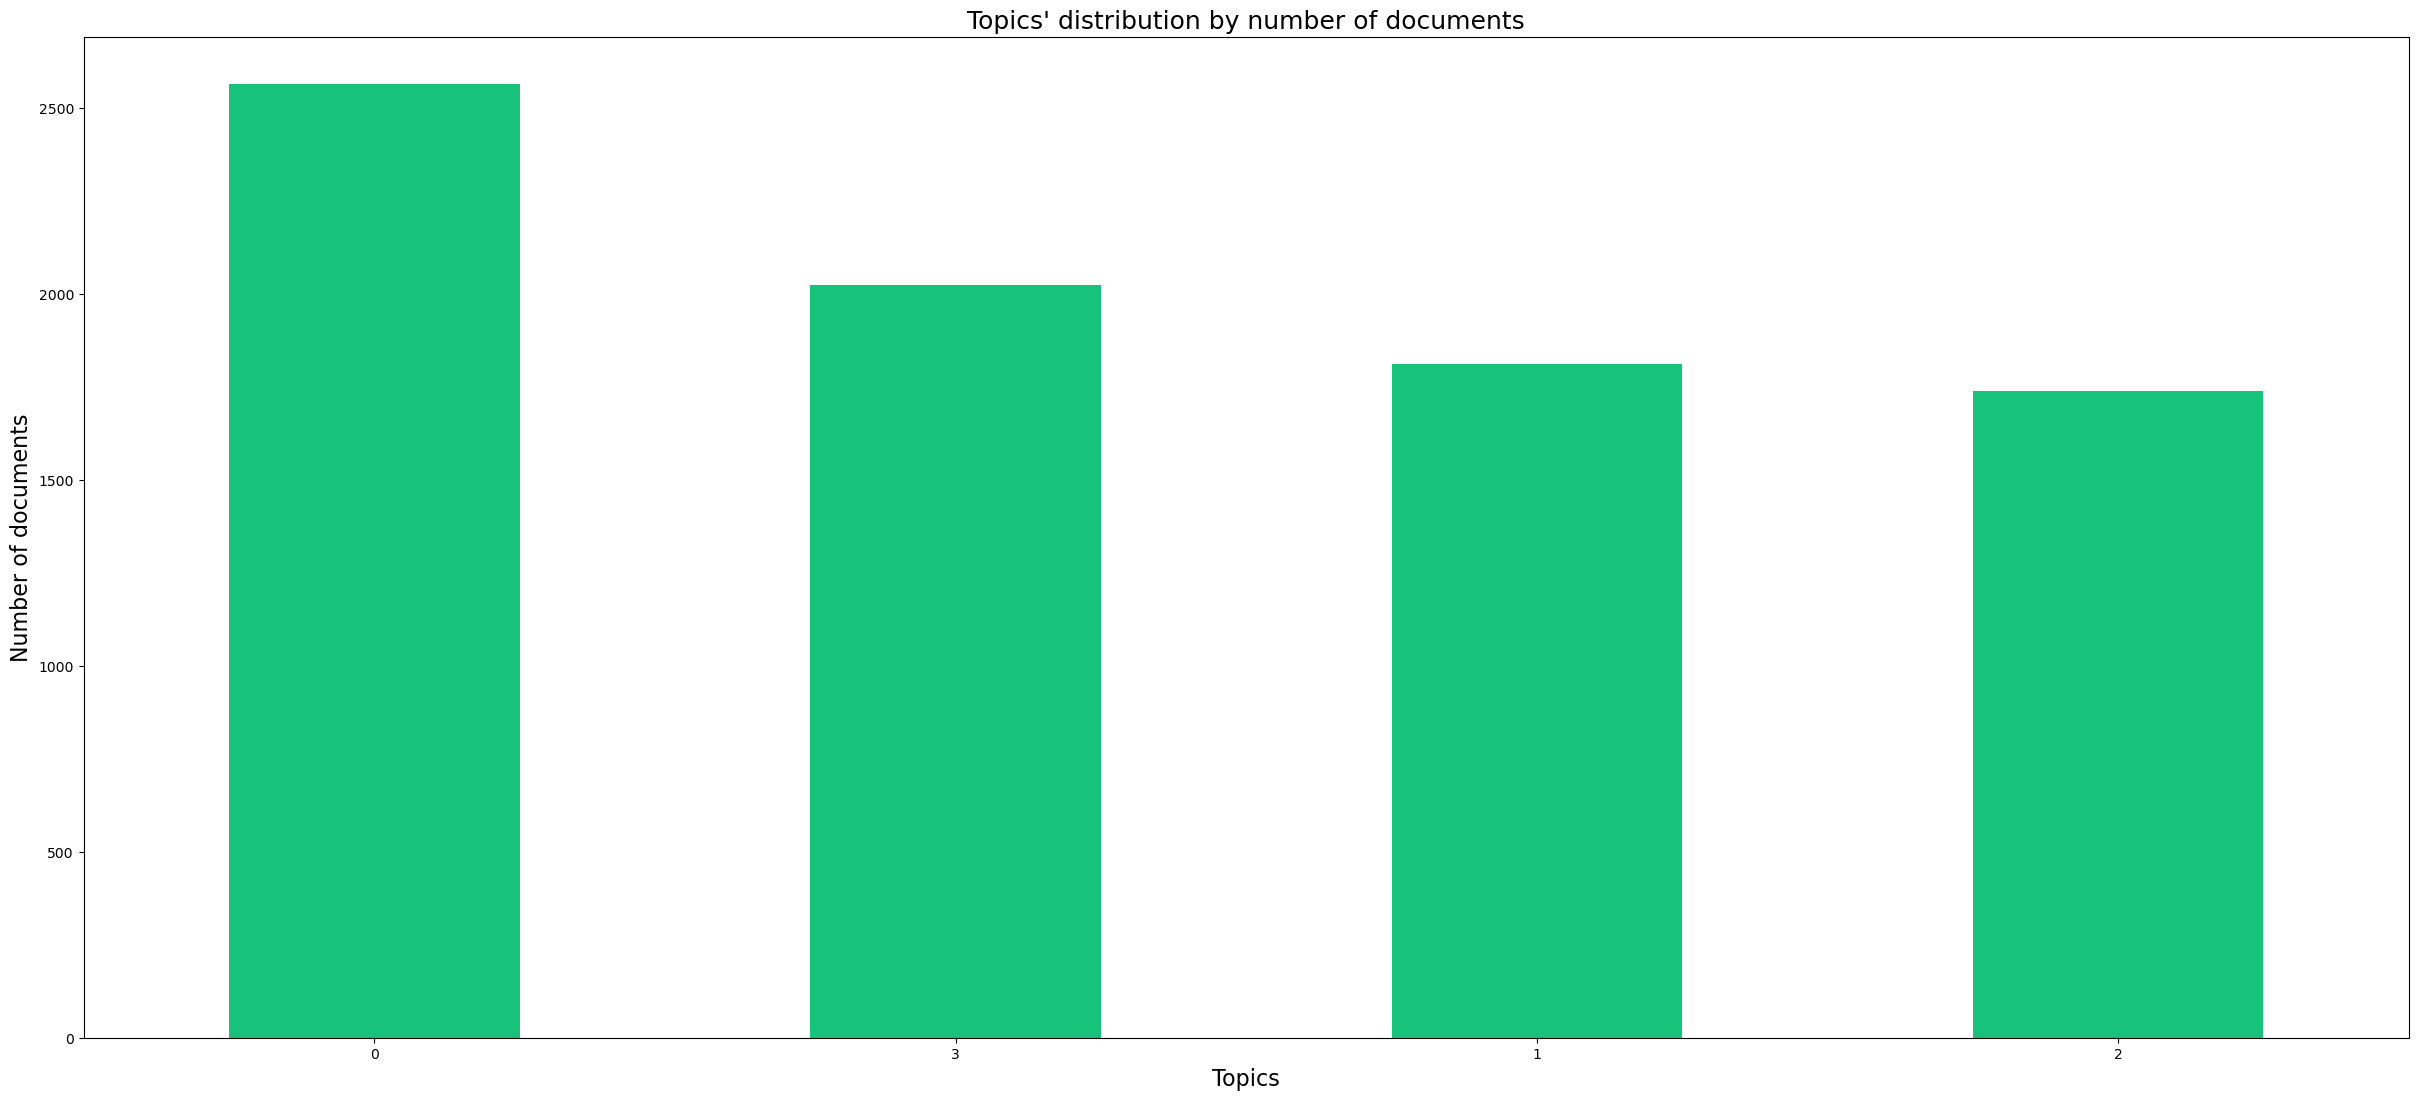

In [182]:
fig = plt.figure(figsize=(30, 13))
plt.subplot(1, 1, 1)
df_topics["topic"].value_counts().plot(kind="bar", color="#17C37B",)
plt.title("Topics' distribution by number of documents", size=18)
plt.xlabel("Topics", size=16)
plt.ylabel("Number of documents", size=16)
plt.xticks(rotation=0)
plt.subplots_adjust(hspace=0.3)
plt.show()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            7) Topics' keywords
        </font>
    </h3>
</div>

In [183]:
df_data["topic"] = df_topics["topic"]

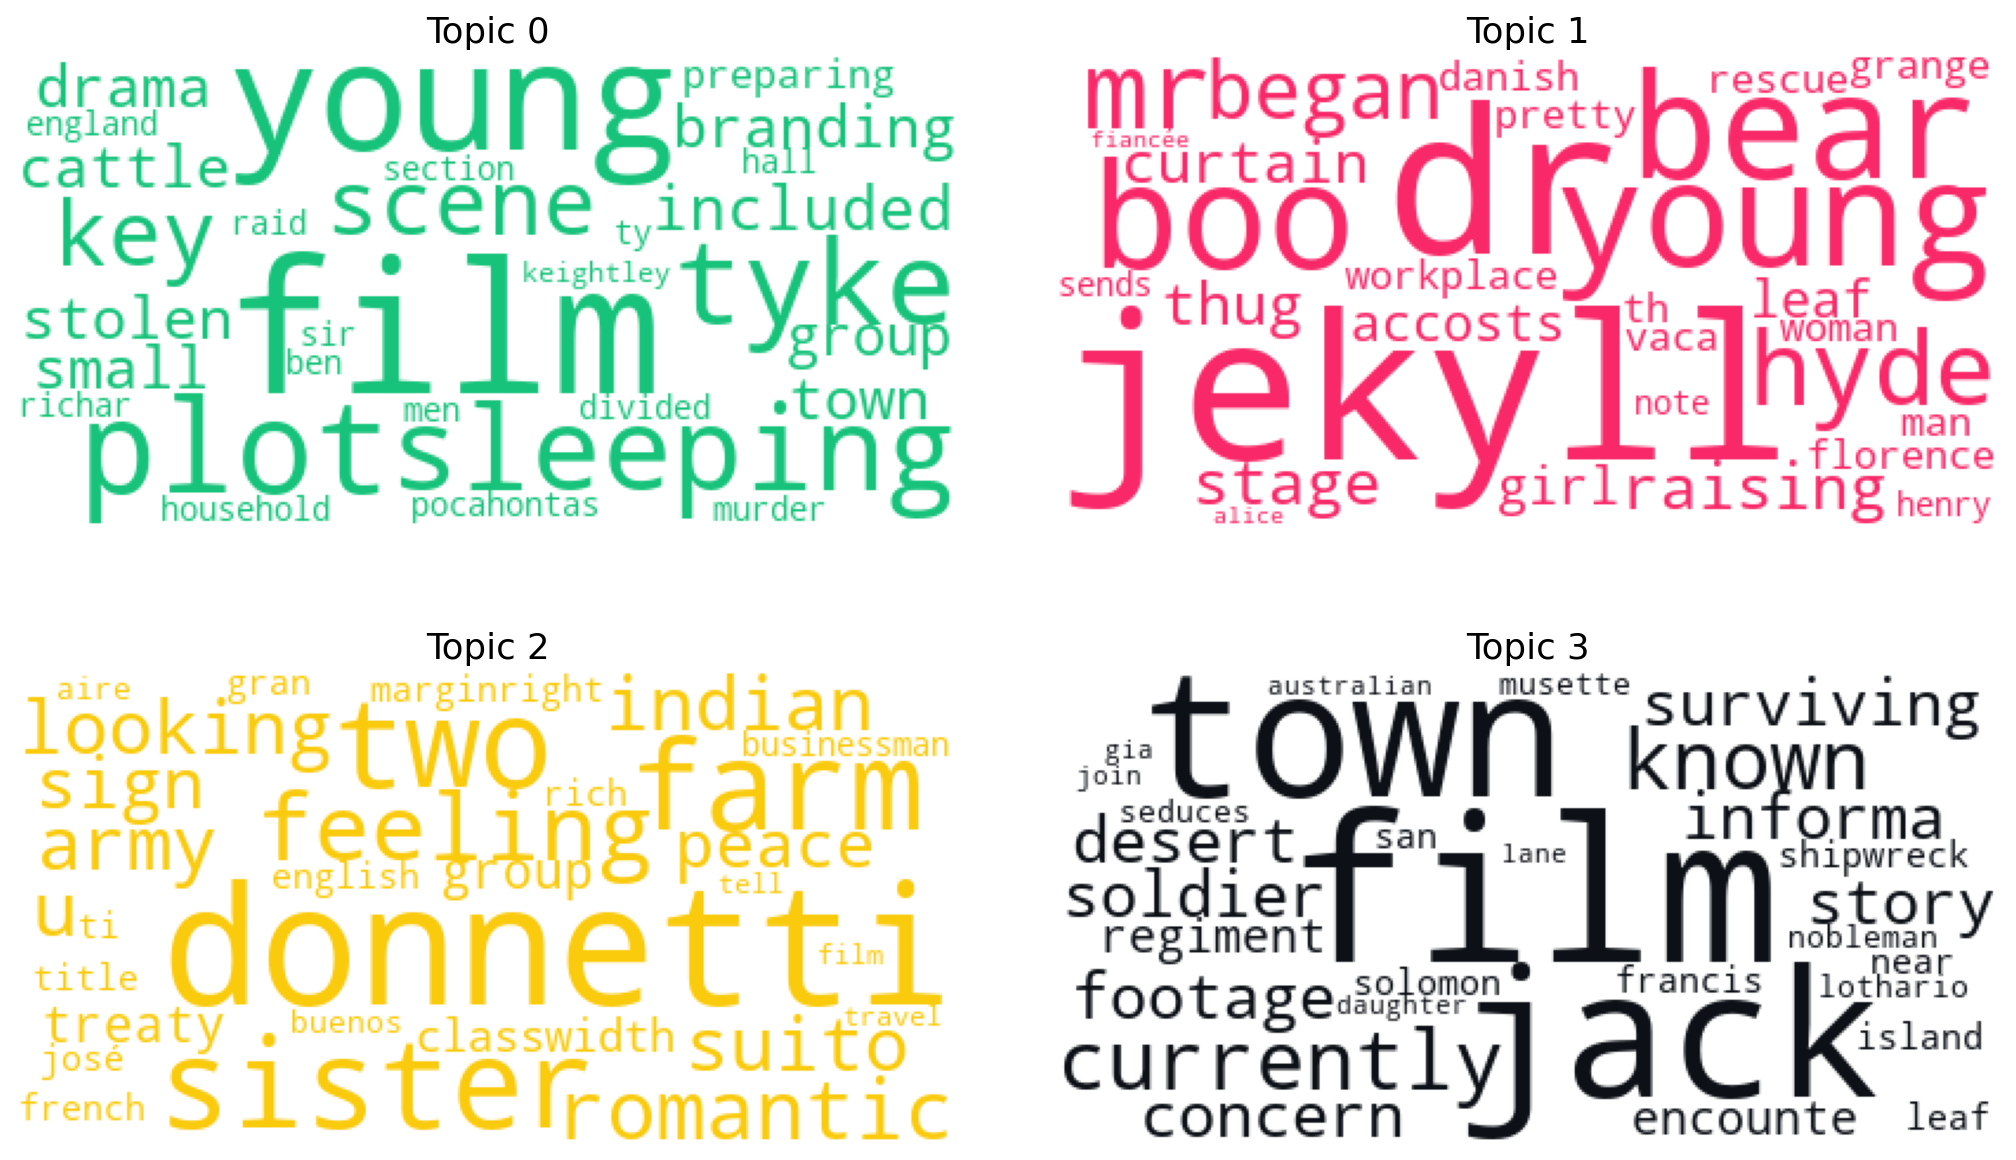

In [184]:
list_colors = ["#17C37B", "#F92969", "#FACA0C", "#0D1117"]

wc = WordCloud(
    max_words=30,
    min_font_size=10,
    background_color="white",
    colormap="tab10",
    color_func=lambda *args, **kwargs: list_colors[i],
    stopwords=None,
    prefer_horizontal=1.0
)

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True, dpi=160)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    wc.generate(
        str(df_data[df_data["topic"]==i]["summary"])
    )
    plt.gca().imshow(wc)
    plt.gca().set_title("Topic "+str(i), fontdict=dict(size=16))
    plt.gca().axis("off")

plt.axis("off")
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.margins(x=0, y=0)
plt.show()